In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

## MNIST : Logistic Regression

In [7]:
data = fetch_openml(name="mnist_784", version=1)
X = data.data
y = data.target

sample_size = 10000
random_indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X.iloc[random_indices]
y_sample = y.iloc[random_indices]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='ovr')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy of Logistic Regression on MNIST (sampled): {accuracy:.4f}")

coef = model.coef_.flatten()
top_30_features = np.argsort(np.abs(coef))[-30:]
print(f"Top 30 features for Logistic Regression on MNIST (sampled): {top_30_features}")


/Users/jenishkothari/Northeastern/DS5230/HWK3A/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/jenishkothari/Northeastern/DS5230/HWK3A/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression on MNIST (sampled): 0.8333
Top 30 features for Logistic Regression on MNIST (sampled): [2663 7248 2964 1963 4511 2684 3045 2803 4421 6977 7703 2739 2720 3018
 7731 2468 7479 7416 6724 7677 4281 7676 7535 2711 7187 4282 4280 7507
 2516 2656]


## MNIST : Decision Tree

Accuracy of Decision Tree on MNIST: 0.8686
Top 30 features for Decision Tree on MNIST: [428 626 153 380 515 372 457 404 297 596 352 656 296 405 290 206 657 273
 354 155 597 270 486 432 211 542 350 347 435 489]


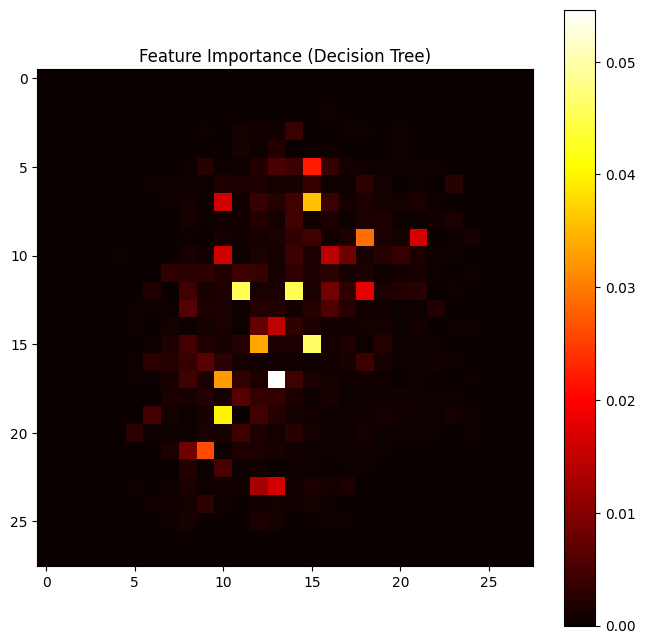

Accuracy of Decision Tree with max_depth=5: 0.6531
Accuracy of Decision Tree with max_depth=10: 0.8544
Accuracy of Decision Tree with max_depth=20: 0.8694
Accuracy of Decision Tree with max_depth=50: 0.8686
Accuracy of Decision Tree with max_depth=100: 0.8686


In [ ]:
data = fetch_openml(name="mnist_784", version=1)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

accuracy = tree.score(X_test,y_test)

top_30_splits = tree.feature_importances_.argsort()[-30:]

print(f"Accuracy of Decision Tree on MNIST: {accuracy:.4f}")
print(f"Top 30 features for Decision Tree on MNIST: {top_30_splits}")


depths = [5, 10, 20, 50, 100]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    print(f"Accuracy of Decision Tree with max_depth={depth}: {accuracy:.4f}")


## 20NG : Logistic Regression

In [10]:
data = fetch_20newsgroups(subset='all')
X, y = data.data, data.target

vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='ovr')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy of Logistic Regression on 20NG (sampled): {accuracy:.4f}")

for class_idx, class_coef in enumerate(model.coef_):
    top_30_features = np.argsort(np.abs(class_coef))[-30:]
    feature_names = np.array(vectorizer.get_feature_names_out())[top_30_features]
    print(f"\nTop 30 features for class {class_idx}: {feature_names}")

/Users/jenishkothari/Northeastern/DS5230/HWK3A/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression on 20NG (sampled): 0.8728

Top 30 features for class 0: ['wwc' 'wingate' 'edu' 'moral' 'sgi' 'rice' 'religious' 'mantis' 'caltech'
 'morality' 'atheist' 'religion' 'mangoe' 'tammy' 'is' 'benedikt' 'god'
 'jaeger' 'kmr4' 'islam' 'cobb' 'livesey' 'osrhe' 'rushdie' 'okcforum'
 'islamic' 'mathew' 'atheism' 'keith' 'atheists']

Top 30 features for class 1: ['algorithm' 'bit' 'program' 'quicktime' 'diablo' 'photoshop' 'version'
 'jpeg' 'vga' 'polygons' 'hacker' 'computer' 'viewer' 'surface' 'gif'
 'files' 'points' 'siggraph' 'animation' 'format' 'the' 'pov' 'polygon'
 'tiff' '3do' 'cview' 'images' 'image' '3d' 'graphics']

Top 30 features for class 2: ['of' 'winbench' 'fonts' 'risc' 'sale' 'program' 'the' 'bmp' 'dos' 'using'
 'printer' 'ini' 'supporters' 'mouse' 'challenge' 'win3' 'nt' 'files' 'ax'
 'drivers' 'font' 'os' 'cica' 'manager' 'win' 'ms' 'driver' 'file'
 'microsoft' 'windows']

Top 30 features for class 3: ['thanks' '17' 'memory' 'ibm' 'isa' 'port' 

## 20NG : Decision Tree

In [12]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy of Decision Tree on 20NG (sampled): {accuracy:.4f}")

feature_importances = model.feature_importances_
top_30_features = np.argsort(feature_importances)[-30:]
feature_names = np.array(vectorizer.get_feature_names_out())[top_30_features]
print(f"\nTop 30 features for Decision Tree on 20NG (sampled): {feature_names}")


depths = [10, 20, 50,100]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    print(f"Accuracy of Decision Tree with max_depth={depth}: {accuracy:.4f}")

Accuracy of Decision Tree on 20NG (sampled): 0.6210

Top 30 features for Decision Tree on 20NG (sampled): ['the' 'controller' 'cars' 'motif' 'cramer' 'encryption' 'waco' 'of'
 'doctor' 'game' 're' 'nhl' 'atheists' 'window' 'turkish' 'mac' 'graphics'
 'bike' 'gun' 'god' 'baseball' 'rutgers' 'car' 'israel' 'space' 'hockey'
 'windows' 'dod' 'sale' 'clipper']
Accuracy of Decision Tree with max_depth=10: 0.2934
Accuracy of Decision Tree with max_depth=20: 0.4146
Accuracy of Decision Tree with max_depth=50: 0.5467
Accuracy of Decision Tree with max_depth=100: 0.6120


In [15]:
data = fetch_20newsgroups(subset='all')
X, y = data.data, data.target

vectorizer = TfidfVectorizer(max_features=10000,stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy of Decision Tree on 20NG (sampled): {accuracy:.4f}")

feature_importances = model.feature_importances_
top_30_features = np.argsort(feature_importances)[-30:]
feature_names = np.array(vectorizer.get_feature_names_out())[top_30_features]
print(f"\nTop 30 features for Decision Tree on 20NG (sampled): {feature_names}")


depths = [10, 20, 50,100]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    print(f"Accuracy of Decision Tree with max_depth={depth}: {accuracy:.4f}")

Accuracy of Decision Tree on 20NG (sampled): 0.6420

Top 30 features for Decision Tree on 20NG (sampled): ['window' 'apple' 'motif' 'encryption' 'cramer' 'x11r5' 'doctor' 'article'
 'controller' 'writes' 'atf' 'edu' 'atheists' 'team' 'turkish' 'mac'
 'graphics' 'gun' 'bike' 'god' 'baseball' 'rutgers' 'israel' 'car' 'space'
 'hockey' 'windows' 'dod' 'sale' 'clipper']
Accuracy of Decision Tree with max_depth=10: 0.2924
Accuracy of Decision Tree with max_depth=20: 0.4202
Accuracy of Decision Tree with max_depth=50: 0.5502
Accuracy of Decision Tree with max_depth=100: 0.6227


## SpamBase : Logistic Regression

In [23]:
data = fetch_openml(name="spambase", version=1)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy of Logistic Regression on SpamBase: {accuracy:.4f}")

coef = model.coef_.flatten()
top_30_features = np.argsort(np.abs(coef))[-30:]
feature_names = data.feature_names
top_30_feature_names = np.array(feature_names)[top_30_features]

print("\nTop 30 features for Logistic Regression on SpamBase:")
for feature in top_30_feature_names:
    print(feature)


Accuracy of Logistic Regression on SpamBase: 0.9327

Top 30 features for Logistic Regression on SpamBase:
word_freq_parts
word_freq_our
word_freq_original
word_freq_table
word_freq_re
word_freq_labs
word_freq_pm
word_freq_3d
word_freq_hpl
word_freq_credit
word_freq_85
word_freq_technology
word_freq_business
char_freq_%3B
char_freq_%23
word_freq_free
word_freq_order
word_freq_data
word_freq_lab
word_freq_cs
word_freq_edu
word_freq_meeting
word_freq_addresses
word_freq_conference
word_freq_project
word_freq_hp
word_freq_remove
word_freq_000
char_freq_%24
word_freq_george


## SpamBase : Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy of Decision Tree on SpamBase: {accuracy:.4f}")
feature_importances = model.feature_importances_
top_30_features = np.argsort(feature_importances)[-30:]
for idx in top_30_features:
    print(f"Feature index {idx}: {feature_importances[idx]:.4f}")


Accuracy of Decision Tree on SpamBase: 0.8993
Feature index 5: 0.0038
Feature index 25: 0.0041
Feature index 17: 0.0043
Feature index 10: 0.0044
Feature index 1: 0.0049
Feature index 8: 0.0053
Feature index 7: 0.0054
Feature index 49: 0.0054
Feature index 9: 0.0055
Feature index 35: 0.0056
Feature index 23: 0.0059
Feature index 38: 0.0068
Feature index 2: 0.0068
Feature index 44: 0.0070
Feature index 16: 0.0081
Feature index 34: 0.0087
Feature index 11: 0.0136
Feature index 20: 0.0143
Feature index 56: 0.0151
Feature index 26: 0.0172
Feature index 45: 0.0182
Feature index 4: 0.0224
Feature index 18: 0.0245
Feature index 55: 0.0290
Feature index 15: 0.0336
Feature index 54: 0.0487
Feature index 24: 0.0555
Feature index 51: 0.0851
Feature index 6: 0.1640
Feature index 52: 0.3317


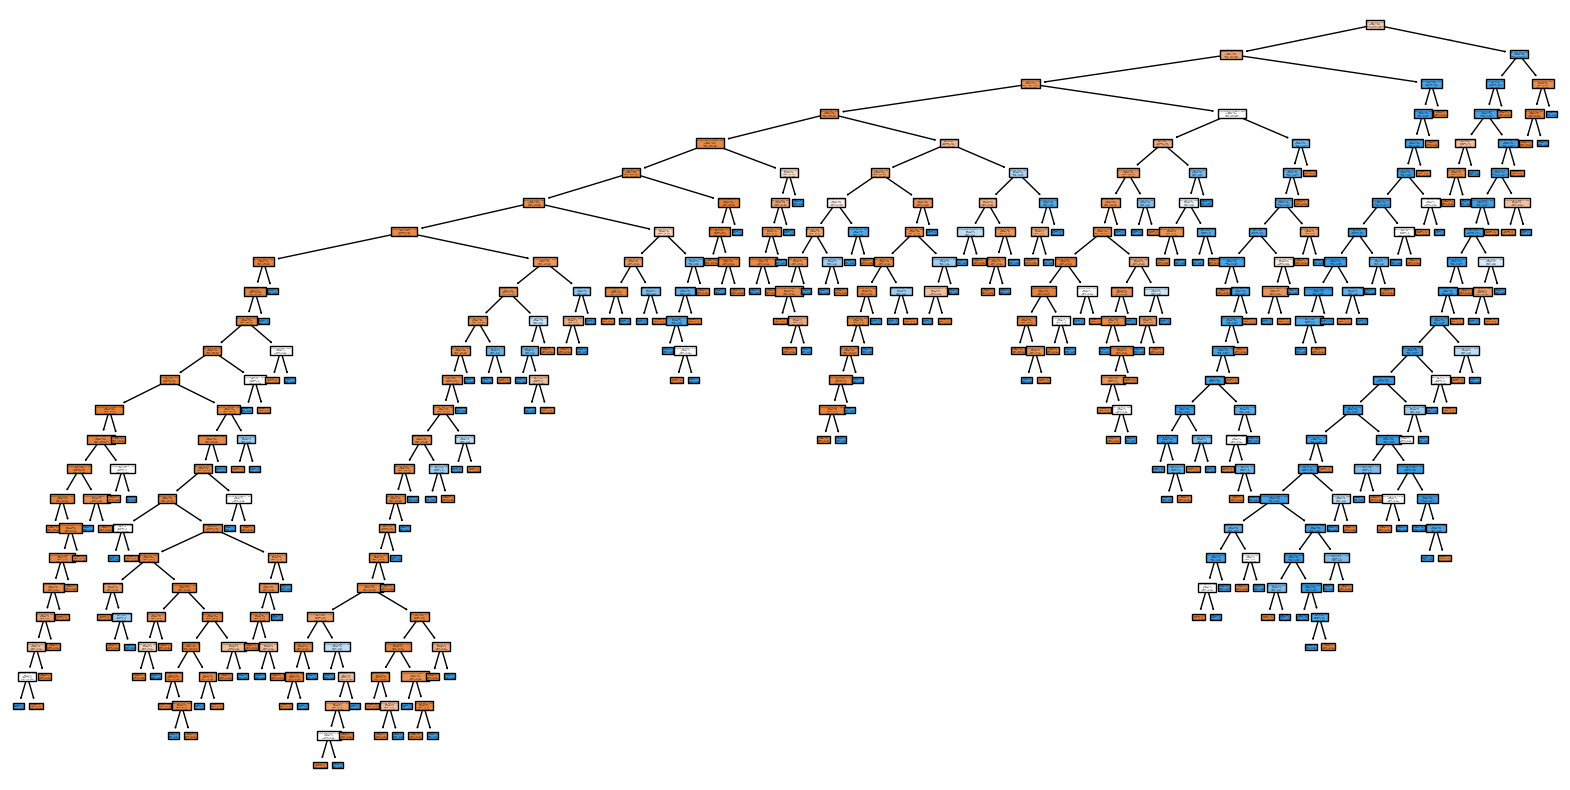

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=['Not Spam', 'Spam'])
plt.show()
